# Evaluation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

For the rest of the homework, you'll need to use only these columns:

Make,
Model,
Year,
Engine HP,
Engine Cylinders,
Transmission Type,
Vehicle Style,
highway MPG,
city mpg

In [2]:
df = pd.read_csv("car-price_data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
col_selected = ["Make", "Model", "Year", "Engine HP", "Engine Cylinders", 
                "Transmission Type", "Vehicle Style", "highway MPG", "city mpg", "MSRP"]
df_sub = df[col_selected]
df_sub.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


## Data preparation 

**Lowercase the column names and replace spaces with underscores**

In [4]:
df_sub.columns = df_sub.columns.str.lower().str.replace(' ', '_')
categorical_col = list(df_sub.columns[df_sub.dtypes == "object"])
categorical_col

['make', 'model', 'transmission_type', 'vehicle_style']

In [5]:
for col in categorical_col:
    df_sub[col] = df_sub[col].str.replace(' ', '_').str.lower()

C:\Users\salma\AppData\Local\Temp\ipykernel_49808\547245431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub[col] = df_sub[col].str.replace(' ', '_').str.lower()


**Fill the missing values with 0**

In [6]:
df_sub.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [7]:
# impute missing values
missing_col = ["engine_hp","engine_cylinders"]
for col in missing_col:
    df_sub[col] = df_sub[col].fillna(0)
    
df_sub.isnull().sum()

C:\Users\salma\AppData\Local\Temp\ipykernel_49808\3511991702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub[col] = df_sub[col].fillna(0)


make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

**Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average**

In [8]:
df_sub.rename(columns={"msrp":"price"}, inplace=True)

df_mod = df_sub.copy()
mean_price = df_mod["price"].mean()
df_mod["above_average"] = (df_mod.price > mean_price).astype(int)
df_mod.drop(columns="price", inplace=True)
df_mod.head()

C:\Users\salma\AppData\Local\Temp\ipykernel_49808\4042664359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.rename(columns={"msrp":"price"}, inplace=True)


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,0


**Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1**

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
def split_data(data, target):
    
    df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
    
    df_full_train = df_full_train.reset_index(drop=True)
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train[target].values
    y_val = df_val[target].values
    y_test = df_test[target].values
    
    
    del df_train[target]
    del df_val[target]
    del df_test[target]
    
    return df_full_train, df_train, df_val, df_test, y_train, y_val, y_test

In [11]:
df_full_train, df_train, df_val, df_test, y_train, y_val, y_test = split_data(data=df_mod, target='above_average')

## Question 1

Let's do that

* For each numerical variable, use it as score and compute AUC with the above_average variable
* Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [12]:
from sklearn.metrics import roc_auc_score

In [13]:
numerical_col = list(df_mod.columns[df_mod.dtypes != "object"])
numerical_col.remove('above_average')

In [14]:
for col in numerical_col:
    score_auc = roc_auc_score(y_train, df_train[col])
    
    if score_auc < 0.5:
        score_auc = roc_auc_score(y_train, -df_train[col])
        
    print(f"For the column {col} the accuracy score is {score_auc}")

For the column year the accuracy score is 0.687551492804683
For the column engine_hp the accuracy score is 0.9171031265539011
For the column engine_cylinders the accuracy score is 0.766116490165669
For the column highway_mpg the accuracy score is 0.6330587871772013
For the column city_mpg the accuracy score is 0.6734244643245233


The numerical variable which has the highest AUC is **engine_hp**

## Question 2 : Training the model

In [15]:
from sklearn.feature_extraction import DictVectorizer

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
def train_model(df, y):
    dico = df.to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(dico)
    
    X = dv.transform(dico)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)
    
    return dv, model
    

In [18]:
def predict(df, dv, model):
    dico = df.to_dict(orient='records')
    
    X = dv.transform(dico)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [19]:
dv, model = train_model(df_train, y_train)
y_pred = predict(df_val, dv, model)

In [20]:
score_auc = roc_auc_score(y_val, y_pred)
round(score_auc,3)

0.976

## Question 3 : Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall

Plot them

In [21]:
def confusion_df(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()

        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['Precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
    df_scores['Recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)


    return df_scores 

In [22]:
df_scores = confusion_df(y_val, y_pred)
df_scores

,threshold,tp,fp,fn,tn,Precision,Recall
0,0.00,654,1729,0,0,0.274444,1.000000
1,0.01,652,854,2,875,0.432935,0.996942
2,0.02,651,702,3,1027,0.481153,0.995413
3,0.03,651,618,3,1111,0.513002,0.995413
4,0.04,650,559,4,1170,0.537634,0.993884
...,...,...,...,...,...,...,...
96,0.96,254,1,400,1728,0.996078,0.388379
97,0.97,241,0,413,1729,1.000000,0.368502
98,0.98,217,0,437,1729,1.000000,0.331804
99,0.99,184,0,470,1729,1.000000,0.281346


In [23]:
def plot_p_r(df_scores):
    l_thresholds = df_scores["threshold"].tolist()
    l_precision = df_scores["Precision"].tolist()
    l_recall = df_scores["Recall"].tolist()
    
    plt.plot(df_scores.threshold, df_scores["Precision"], label='Precision')
    plt.plot(df_scores.threshold, df_scores['Recall'], label='Recall')

    plt.legend()
    plt.show()

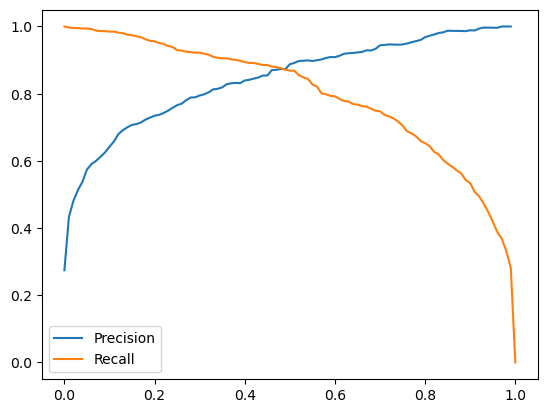

In [24]:
plot_p_r(df_scores)

In [25]:
df_scores[round(df_scores["Precision"],2) == round(df_scores["Recall"],2)]

,threshold,tp,fp,fn,tn,Precision,Recall
49,0.49,570,83,84,1646,0.872894,0.87156


## Question 4 : F1 score 

In [26]:
df_scores["f1_score"] = 2 * ((df_scores.Precision * df_scores.Recall)/(df_scores.Precision + df_scores.Recall))

In [27]:
def plot_f1(df_scores):
    plt.plot(df_scores.threshold, df_scores.f1_score)
    plt.xticks(np.linspace(0, 1, 11))
    plt.show()

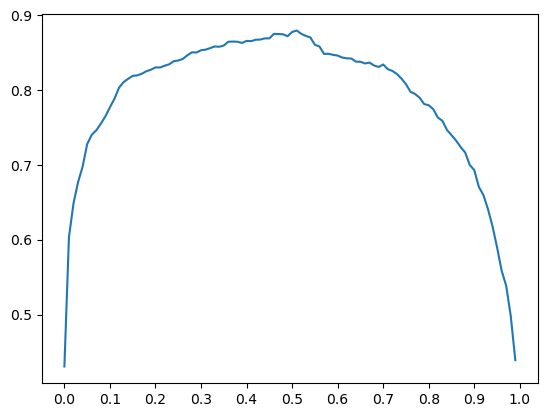

In [28]:
plot_f1(df_scores)

In [29]:
df_scores[df_scores["f1_score"] == df_scores["f1_score"].max()]

,threshold,tp,fp,fn,tn,Precision,Recall,f1_score
51,0.51,568,69,86,1660,0.89168,0.868502,0.879938


F1 is maximal at the threshold 0.51

## Question 5: 5-Fold CV

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

* Iterate over different folds of df_full_train
* Split the data into train and validation
* Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
* Use AUC to evaluate the model on validation



In [30]:
from sklearn.model_selection import KFold

In [31]:
from tqdm.auto import tqdm

In [32]:
def train_model(df, y, C=1.0):
    dico = df.to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(dico)
    
    X = dv.transform(dico)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)
    
    return dv, model
    

In [33]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    


    y_train = df_train["above_average"].values
    y_val = df_val["above_average"].values
    
        
    del df_train["above_average"]
    del df_val["above_average"]

    dv, model = train_model(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.978 +- 0.001


The large standard devidation of the scores across different folds is 0.001

## Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: [0.01, 0.1, 0.5, 10]
* Initialize KFold with the same parameters as previously
* Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [34]:
n_splits = 5

for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train["above_average"].values
        y_val = df_val["above_average"].values
        
        del df_train["above_average"]
        del df_val["above_average"]

        dv, model = train_model(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.952 +- 0.002
C=0.1 0.972 +- 0.002
C=0.5 0.980 +- 0.002
C=10 0.983 +- 0.004


With C=10